In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.grid'] = False

color = sns.color_palette()
plt.style.use('fivethirtyeight')

import matplotlib.font_manager as fm
parameters = {
    'axes.labelsize': 12,
    'axes.titlesize': 18,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
}
plt.rcParams.update(parameters)

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir(r'c:\Users\ADMIN_PC\Desktop\data-analysis\kaggle-game-battleground')
train = pd.read_csv('data/train.csv')

print(train.head())

print(train.shape)
print(train.isnull().sum())

## 메모리 최적화하기
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    # end_mem = df.memory_usage().sum() / 1024**2
    # print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    # print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df
train = reduce_mem_usage(train)
print(train.info())

KeyboardInterrupt: 

KeyboardInterrupt: 

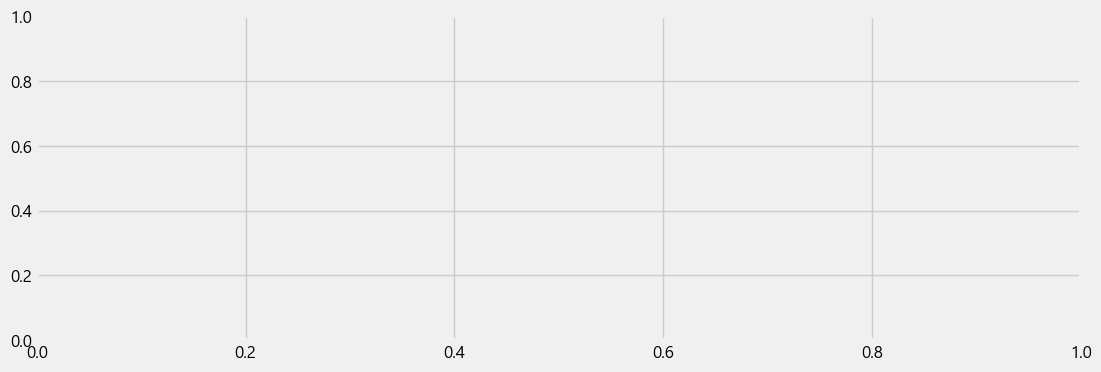

In [8]:
plt.figure(figsize=(12,4))
sns.countplot(x='kills', data=train) # 킬 0번, 1번, 2번.. 각각 몇 명인지
plt.title('플레이어들의 kills 횟수')
plt.show()

print("\n", "kills 횟수 평균")
print(train['kills'].mean())

print("\n", "kills 횟수 최대값")
print(train['kills'].max())

plt.figure(figsize=(12,4))
sns.displot(x=train['matchDuration'], bins=10) # 게임 시간이 어떤 범위에 주로 분포하는가
plt.title('플레이어들의 matchDuration 분포:')
plt.show()

plt.figure(figsize=(12,4))
sns.countplot(x='teamKills', data=train) # 팀킬 횟수
plt.title('플레이어들의 teamKills 분포:')
plt.ylim([0, 100000])
plt.show()

plt.figure(figsize=(12,4))
sns.displot(x=train['longestKill'], bins=10) # 가장 먼 거리에 쏜 횟수
plt.title('플레이어들의 longestKill 분포:')
plt.xlim([0, 200])
plt.show()

plt.figure(figsize=(12,4))
sns.displot(x=train['walkDistance'], bins=10) # 걸은 거리
plt.title('플레이어들의 walkDistance 분포:')
plt.show()

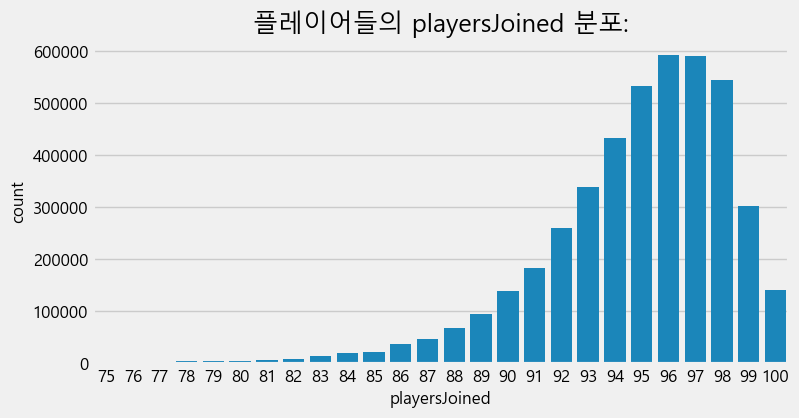

In [ ]:
train['playersJoined'] = train.groupby('matchId')['groupId'].transform('count')
plt.figure(figsize=(8,4))
sns.countplot(x=train[train['playersJoined']>=75]['playersJoined'])
plt.title('플레이어들의 playersJoined 분포:')
plt.show()

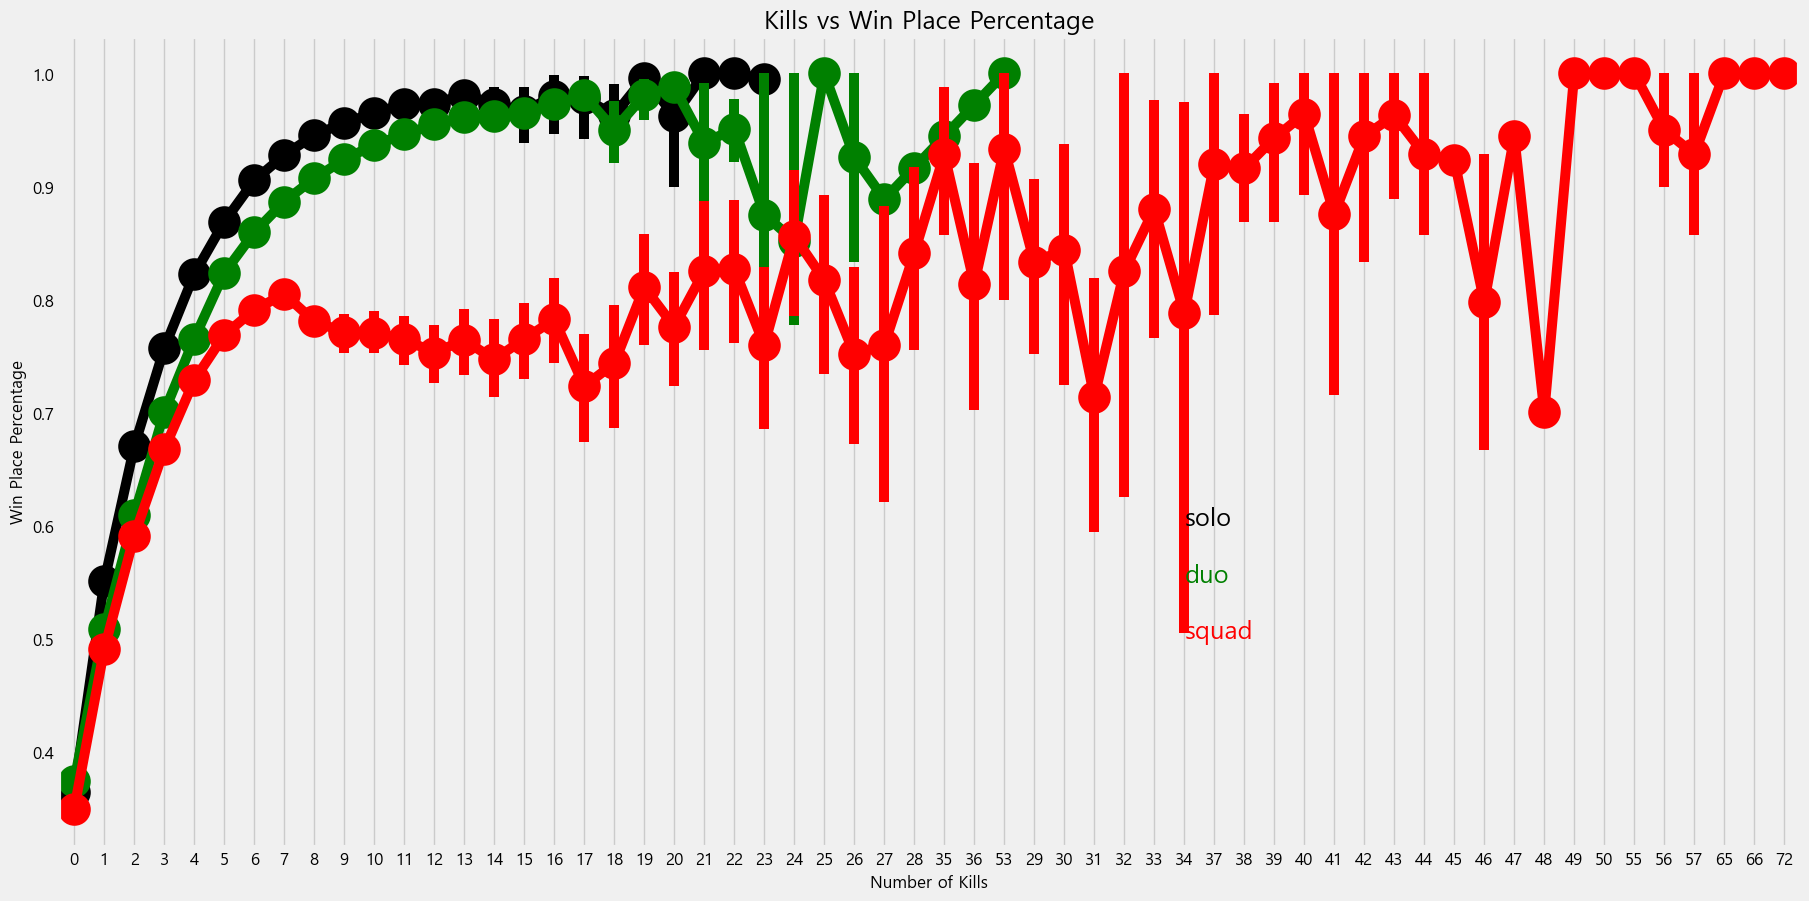

In [13]:
train['matchType'].value_counts()

solo = train[train['numGroups'] > 50]
duo = train[(train['numGroups'] > 25) & (train['numGroups'] <= 50)]
squad = train[train['numGroups'] <= 25]

f,ax1 = plt.subplots(figsize = (20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solo, color='black')
sns.pointplot(x='kills',y='winPlacePerc',data=duo, color='green')
sns.pointplot(x='kills',y='winPlacePerc',data=squad, color='red')
plt.text(37,0.6,'solo',fontsize=18,color='black')
plt.text(37,0.55,'duo',fontsize=18,color='green')
plt.text(37,0.5,'squad',fontsize=18,color='red')
plt.xlabel('Number of Kills', fontsize=12, color='black')
plt.ylabel('Win Place Percentage', fontsize=12, color='black')
plt.title('Kills vs Win Place Percentage', fontsize=18, color='black')
plt.grid()
plt.show()

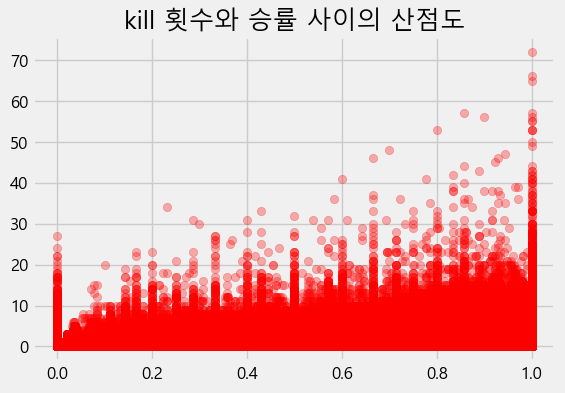

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(x=train['winPlacePerc'],y=train['kills'],color='red',alpha=0.3)
plt.title('kill 횟수와 승률 사이의 산점도')
plt.show()

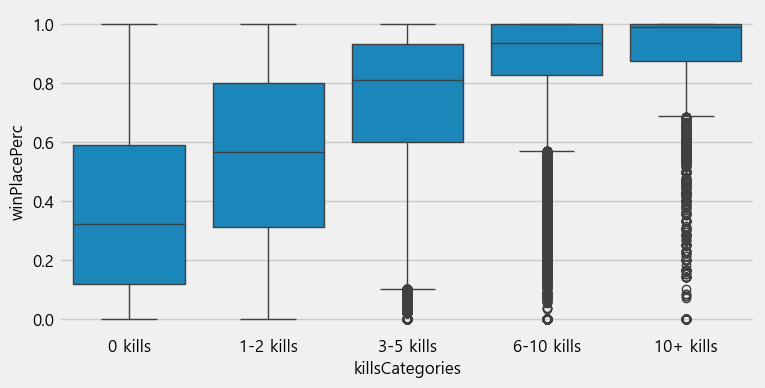

In [15]:
kills = train[['kills','winPlacePerc']]
kills['killsCategories'] = pd.cut(kills['kills'],[-1,0,2,5,10,80], labels=['0 kills','1-2 kills','3-5 kills','6-10 kills','10+ kills'])

plt.figure(figsize=(8,4))
sns.boxplot(x='killsCategories',y='winPlacePerc',data=kills)
plt.show()

In [16]:
print("결측치 개수:", train['winPlacePerc'].isnull().sum())

결측치 개수: 1


In [17]:
train[train['winPlacePerc'].isnull()]
train = train.drop(2744604).reset_index(drop=True)